In [1]:
from sympy import *
from sympy.plotting import plot,plot3d
from sympy import latex
import time
from sympy.matrices import *
from mpmath import pi

Declare the variables

In [45]:
FrS, FrT = symbols('FrS FrT', real=True)
k, l, alpha, ap = symbols( 'k l alpha ap',real=True)
H, U, g, bigphi, llambda = symbols('H U g bigphi llambda', real=True)
p, t, Deltat = symbols('p t Deltat')
Omega, KH, Beta, Upp = symbols('Omega KH Beta Upp', real=True)
x, y, z = symbols('x y z', real=True)
omega2 = symbols('omega2',real=True)
a, b, c, d, phi, theta, nu = symbols('a b c d phi theta nu',real=True)

In [3]:
init_printing(use_unicode=True)

2d case

In [5]:
u = sin(x)*cos(y)*exp(-2*nu*t)
v = -cos(x)*sin(y)*exp(-2*nu*t)


In [7]:
latex(u)

'e^{- 2 \\nu t} \\sin{\\left (x \\right )} \\cos{\\left (y \\right )}'

In [9]:
gradp = -collect((diff(u,x)*diff(u,x)+2*diff(v,x)*diff(u,y)+diff(v,y)*diff(v,y)),exp(-4*nu*t))

In [10]:
print(simplify(gradp))

-(cos(2*x) + cos(2*y))*exp(-4*nu*t)


In [11]:
p = -(cos(2*x)+cos(2*y))*exp(-4*nu*t)/4

In [12]:
pgradcheck = diff(diff(p,x),x)+diff(diff(p,y),y)
print(collect(pgradcheck,exp(-4*nu*t)))

(cos(2*x) + cos(2*y))*exp(-4*nu*t)


In [13]:
Enfun = u*u+v*v
print (Enfun)

exp(-4*nu*t)*sin(x)**2*cos(y)**2 + exp(-4*nu*t)*sin(y)**2*cos(x)**2


In [17]:
En = integrate(integrate(Enfun,(x,0,2*pi)),(y,0,2*pi))/2
print(En)
print(pi*pi)

9.86960440108936*exp(-4*nu*t)
9.86960440108936


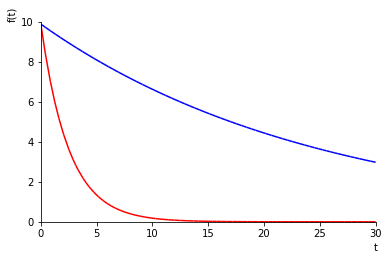

In [101]:
p1 = plot(En.subs(nu,.01),(t,0,30), show=False, line_color='b')
p1a = plot(En.subs(nu,.1),(t,0,30), show=False, line_color='r')
p1.extend(p1a)
p1.show()

How do these solutions satisfy Navier-Stokes?

In [84]:
NSx = diff(u,t)+u*diff(u,x)+v*diff(u,y)-diff(p,x)-nu*(diff(diff(u,x),x)+diff(diff(u,y),y))
print(collect(NSx,exp(-4*nu*t)))
print(simplify(collect(NSx,exp(-4*nu*t))))

(sin(x)*sin(y)**2*cos(x) + sin(x)*cos(x)*cos(y)**2 - sin(2*x)/2)*exp(-4*nu*t)
0


In [85]:
NSy = diff(v,t)+u*diff(v,x)+v*diff(v,y)-diff(p,y)-nu*(diff(diff(v,x),x)+diff(diff(v,y),y))
print(collect(NSy,exp(-4*nu*t)))
print(simplify(collect(NSy,exp(-4*nu*t))))

(sin(x)**2*sin(y)*cos(y) + sin(y)*cos(x)**2*cos(y) - sin(2*y)/2)*exp(-4*nu*t)
0


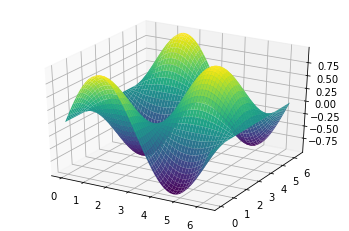

In [91]:
p2 = plot3d(u.subs(t,0),(x,0,2*pi),(y,0,2*pi))

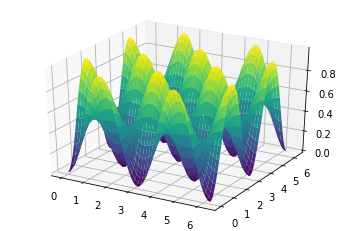

In [93]:
p3 = plot3d(Enfun.subs(t,0),(x,0,2*pi),(y,0,2*pi))

This is for $\omega^2$

In [ ]:
omega2ell0 = 2.2*2.2+k*k
omega2ell1 = 2.2*2.2+(k*k+1)
omega2ell3 = 2.2*2.2+(k*k+3*3)
omega = sqrt(omega2ell0)

In [ ]:
p1 = plot(omega2ell1,(k,-5,5), show=False, line_color='b')
p2 = plot(omega2ell3,(k,-5,5), show=False, line_color='r')
p1.extend(p2)
p3 = plot(omega2ell0,(k,-5,5), show=False, line_color='g')
p1.extend(p3)
p1.show()


The next bit is for the domain from (0,1) X (0,1)

In [18]:
uOne = a*sin(2*pi*x)*cos(2*pi*y)*exp(-2*b*nu*t)
vOne = -a*cos(2*pi*x)*sin(2*pi*y)*exp(-2*b*nu*t)
pOne = c*(cos(2*x*2*pi)+cos(2*y*2*pi))*exp(-4*b*nu*t)/4

In [266]:
#
# Check continuity
#
diff(uOne,x)+diff(vOne,y)

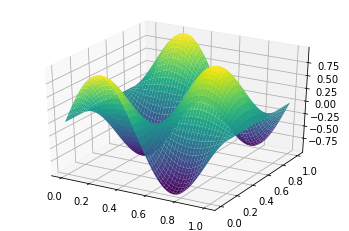

In [268]:
plot3d(uOne.subs(t,0).subs(a,1),(x,0,1),(y,0,1))

In [269]:
pgradOne = -collect((diff(uOne,x)*diff(uOne,x)+2*diff(vOne,x)*diff(uOne,y)+diff(vOne,y)*diff(vOne,y)),exp(-4*nu*t))

In [270]:
print(simplify(pgradOne))

-a**2*(39.4784176043574*cos(12.5663706143592*x)*cos(12.5663706143592*y) + 39.4784176043574)*exp(-4*b*nu*t)


In [271]:
pgradcheck = diff(diff(pOne,x),x)+diff(diff(pOne,y),y)
print(collect(pgradcheck,exp(-4*nu*t)))

-39.4784176043574*c*exp(-4*b*nu*t)*cos(12.5663706143592*x) - 39.4784176043574*c*exp(-4*b*nu*t)*cos(12.5663706143592*y)


In [256]:
collect(simplify(simplify(pgradcheck)-simplify(pgradOne)),cos(2*2*pi*y))

In [257]:
NSxOne = diff(uOne,t)+uOne*diff(uOne,x)+vOne*diff(uOne,y)-diff(pOne,x)-nu*(diff(diff(uOne,x),x)+diff(diff(uOne,y),y))
print(collect(NSxOne,exp(-4*nu*t)))
#print(simplify(collect(NSxOne,exp(-4*nu*t))))

76.9568352087149*nu*exp(-2*nu*t)*sin(6.28318530717959*x)*cos(6.28318530717959*y) + (6.28318530717959*sin(6.28318530717959*x)*sin(6.28318530717959*y)**2*cos(6.28318530717959*x) + 6.28318530717959*sin(6.28318530717959*x)*cos(6.28318530717959*x)*cos(6.28318530717959*y)**2 + 3.14159265358979*sin(12.5663706143592*x))*exp(-4*nu*t)


In [258]:
print(pi*2*pi*2)

39.4784176043574


In [272]:
simplify(uOne*diff(uOne,x)+vOne*diff(uOne,y))

In [273]:
diff(pOne,x)

In [274]:
diff(uOne,t)

In [275]:
nu*(diff(diff(uOne,x),x)+diff(diff(uOne,y),y))

In [213]:
print(2*(2*pi)**2)

78.9568352087149



\begin{equation}
2~a~b~\nu=2(2\pi)^2~a~\nu
\end{equation}
\begin{equation}
~b=(2\pi)^2
\end{equation}
So I cannot have b=1. The decay rate for my Taylor green vortex is different.

For the other requirement,
\begin{equation}
c=a^2.
\end{equation}

Therefore, try the following and hence see that nu must be divided by $(2\pi)^2$ to get the same rate of decay.


In [24]:
uOne = sin(2*pi*x)*cos(2*pi*y)*exp(-2*(2*pi)**2*nu*t)
vOne = -cos(2*pi*x)*sin(2*pi*y)*exp(-2*(2*pi)**2*nu*t)
pOne = (cos(2*x*2*pi)+cos(2*y*2*pi))*exp(-4*(2*pi)**2*nu*t)/4

In [25]:
simplify(uOne*diff(uOne,x)+vOne*diff(uOne,y))

In [26]:
diff(pOne,x)

In [27]:
diff(uOne,t)

In [28]:
nu*(diff(diff(uOne,x),x)+diff(diff(uOne,y),y))

In [29]:
EnOne = uOne*uOne+vOne*vOne

In [32]:
integrate(integrate(EnOne,(x,0,1)),(y,0,1))

In [35]:
print(4*2*pi*2*pi)

157.91367041743


This begs the question, is there any way at all to get b = 1 on the domain (0,1)X(0,1)? The answer is, the function is not periodic without the 2pi!

In [281]:
d, e, f, g, h, p = symbols('d e f g h p',real=True)

uOne = a*sin(2*pi*d*x)*cos(2*pi*e*y)*exp(-2*b*nu*t)
vOne = -a*cos(2*pi*f*x)*sin(2*pi*g*y)*exp(-2*b*nu*t)
pOne = c*(cos(2*x*2*h*pi)+cos(2*y*2*p*pi))*exp(-4*b*nu*t)/4

In [282]:
simplify(uOne*diff(uOne,x)+vOne*diff(uOne,y))

In [283]:
diff(pOne,x)

In [284]:
diff(uOne,t)

In [285]:
nu*(diff(diff(uOne,x),x)+diff(diff(uOne,y),y))

d=e, f=g, d=f

In [289]:
uOne = a*sin(2*pi*d*x)*cos(2*pi*d*y)*exp(-2*b*nu*t)
vOne = -a*cos(2*pi*d*x)*sin(2*pi*d*y)*exp(-2*b*nu*t)
pOne = c*(cos(2*x*2*h*pi)+cos(2*y*2*p*pi))*exp(-4*b*nu*t)/4

In [290]:
simplify(uOne*diff(uOne,x)+vOne*diff(uOne,y))

In [291]:
diff(pOne,x)

In [292]:
diff(uOne,t)

In [293]:
nu*(diff(diff(uOne,x),x)+diff(diff(uOne,y),y))

\begin{equation}
b=d^2 (2\pi)^2
\end{equation}
so if I want b=1,
\begin{equation}
d=\sqrt(1/(2\pi)^2)=1/(2\pi)
\end{equation}

In [301]:
uOne = sin(x)*cos(y)*exp(-2*b*nu*t)
vOne = -cos(x)*sin(y)*exp(-2*b*nu*t)
pOne = (cos(2*x)+cos(2*y))*exp(-4*b*nu*t)/4

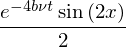

In [302]:
simplify(uOne*diff(uOne,x)+vOne*diff(uOne,y))

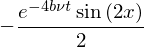

In [303]:
diff(pOne,x)

In [304]:
diff(uOne,t)

In [305]:
nu*(diff(diff(uOne,x),x)+diff(diff(uOne,y),y))

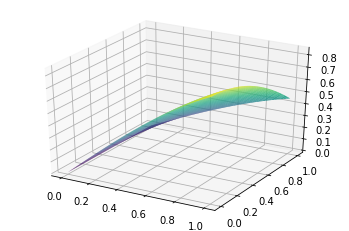

In [306]:
plot3d(uOne.subs(t,0).subs(b,1),(x,0,1),(y,0,1))

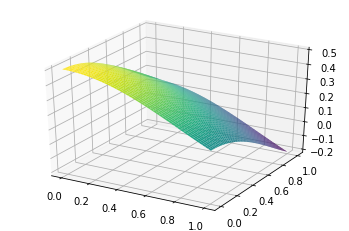

In [307]:
plot3d(pOne.subs(t,0).subs(b,1),(x,0,1),(y,0,1))

In [310]:
EnergyOne = integrate(integrate(uOne*uOne+vOne*vOne,(x,0,1)),(y,0,1))/2

In [311]:
EnergyOne.evalf()

In [313]:
Energy2pi = integrate(integrate(u*u+v*v,(x,0,2*pi)),(y,0,2*pi))/2
Energy2pi.evalf()

In 3d

In [60]:
uOne = sin(2*pi*x)*cos(2*pi*y)*cos(2*pi*z)*exp(-3*(2*pi)**2*nu*t)
vOne = -cos(2*pi*x)*sin(2*pi*y)*cos(2*pi*z)*exp(-3*(2*pi)**2*nu*t)
pOne = (cos(2*x*2*pi)+cos(2*y*2*pi))*exp(-6*(2*pi)**2*nu*t)/4*cos(z*2*pi)**2
wOne = 0.

In [61]:
simplify(uOne*diff(uOne,x)+vOne*diff(uOne,y)+wOne*diff(uOne,z))

In [62]:
diff(uOne,x)*uOne

In [63]:
vOne*diff(uOne,y)

In [66]:
#
# recall again that sin(2a)=2sinacosa
#

diff(pOne,x)

In [67]:
diff(uOne,t)

In [68]:
nu*(diff(diff(uOne,x),x)+diff(diff(uOne,y),y)+diff(diff(uOne,z),z))

In [383]:
pgradOne = -collect((diff(uOne,x)*diff(uOne,x)+2*diff(vOne,x)*diff(uOne,y)+diff(vOne,y)*diff(vOne,y)+2*diff(wOne,x)*diff(uOne,z)+2*diff(wOne,y)*diff(vOne,z)+diff(wOne,z)*diff(wOne,z)),exp(-6*(2*pi)**2*nu*t))

In [384]:
simplify(pgradOne)

In [388]:
simplify(expand(diff(diff(pOne,x),x)+diff(diff(pOne,y),y)+diff(diff(pOne,z),z)))

In [392]:
checkp = diff(diff(pOne,x),x)+diff(diff(pOne,y),y)+diff(diff(pOne,z),z)
foo = checkp.subs(sin(2*pi*z)**2,1-cos(2*pi*z)**2)

In [395]:
simplify(expand(foo))

In [397]:
collect(simplify(expand(foo)),cos(2*pi*z)**2)

In [36]:
u = sin(x)*cos(y)*cos(z)*exp(-3*nu*t)
v = -cos(x)*sin(y)*cos(z)*exp(-3*nu*t)
p = (cos(2*x)+cos(2*y))*exp(-6*nu*t)/4*cos(z)**2
w = 0.

In [37]:
simplify(u*diff(u,x)+v*diff(u,y)+w*diff(u,z))

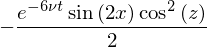

In [38]:
diff(p,x)

Since we can use

\begin(equation)
\sin(2x)=2\sin(x)\cos(x)
\end(equation)

We see this is an exact balance.

In [40]:
diff(u,t)

In [41]:
nu*(diff(diff(u,x),x)+diff(diff(u,y),y)+diff(diff(u,z),z))

What about dp/dz?

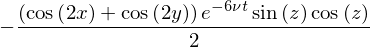

In [42]:
diff(p,z)

Try

In [55]:
w = exp(-3*nu*t)*sin(z)*(cos(2*x)+cos(2*y))

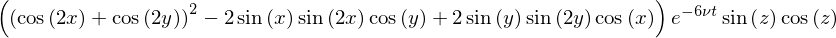

In [57]:
simplify(u*diff(w,x)+v*diff(w,y)+w*diff(w,z))

In [58]:
integrate(integrate(integrate(1,(x,0,2*pi)),(y,0,2*pi)),(z,0,2*pi))

In [59]:
print(8*pi**3)

248.050213442399


In [ ]:
#
# Then with the (0,1) type domain
#

u = sin(x)*cos(y)*cos(z)*exp(-3*nu*t)
v = -cos(x)*sin(y)*cos(z)*exp(-3*nu*t)
p = (cos(2*x)+cos(2*y))*exp(-6*nu*t)/4*cos(z)**2
w = 0.